In [2]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
M = pickle.load(open('Data/Chodera_data/Processed/MSM_lag1.0.pickle', 'rb'))
HMM = pickle.load(open('Data/Chodera_data/Processed/HMM_lag1.0.pickle', 'rb'))

In [4]:
M

MaximumLikelihoodMSM(connectivity='largest', count_mode='sliding',
           dt_traj='1 step', lag=10, maxerr=1e-08, maxiter=1000000,
           reversible=True, score_k=10, score_method='VAMP2', sparse=False,
           statdist_constraint=None)

In [5]:
traj_name = 'Data/Chodera_data/Processed/otraj_lag1.0ps.npy'

In [6]:
traj = np.load(traj_name)

In [7]:
levs = M.eigenvectors_left(k=10)
revs = M.eigenvectors_right(k=10)

In [8]:
print(levs.shape)
print(revs.shape)

(10, 500)
(500, 10)


In [42]:
timescales = M.timescales(k=100)

array([ 372.59690293,  250.9366756 ,   90.66997672,   35.7379443 ,
         29.31737649,   21.65254094,   13.16113156,   12.4574328 ,
          8.5611381 ,    7.94301451,    7.61364783,    7.53310638,
          5.79418081,    5.64454784,    5.57612716,    5.23097624,
          4.9330974 ,    4.78537147,    4.36407547,    4.28516924,
          4.12024184,    3.94283466,    3.78260793,    3.74935436,
          3.70851453,    3.6463766 ,    3.64361321,    3.53275068,
          3.49388654,    3.47433786,    3.47098929,    3.45300391,
          3.44673159,    3.42069637,    3.39871195,    3.37935861,
          3.37040341,    3.36649348,    3.35380793,    3.3519147 ,
          3.33405054,    3.31413204,    3.30719219,    3.29223083,
          3.28212351,    3.28043133,    3.26367024,    3.25586549,
          3.24977757,    3.24744227,    3.23324798,    3.23312875,
          3.2258737 ,    3.20670613,    3.20571651,    3.19660493,
          3.19156511,    3.18333822,    3.17053865,    3.16970

In [10]:
robust_ts_idx = np.where(timescales>M.lag)[0] + 1
robust_ts_idx

array([1, 2, 3, 4, 5, 6, 7, 8])

In [43]:
timescales[robust_ts_idx]

array([ 250.9366756 ,   90.66997672,   35.7379443 ,   29.31737649,
         21.65254094,   13.16113156,   12.4574328 ,    8.5611381 ])

In [11]:
modes = np.concatenate([levs[i][traj][:, np.newaxis] for i in robust_ts_idx], axis=1)

In [12]:
modes.shape

(500000, 8)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_modes = scaler.fit_transform(modes)

In [37]:
slow_modes = scaled_modes[:,:HMM.nstates-1]
fast_modes = scaled_modes[:,HMM.nstates-1:]

In [38]:
dfast = fast_modes[1:, :]/fast_modes[:-1, :]


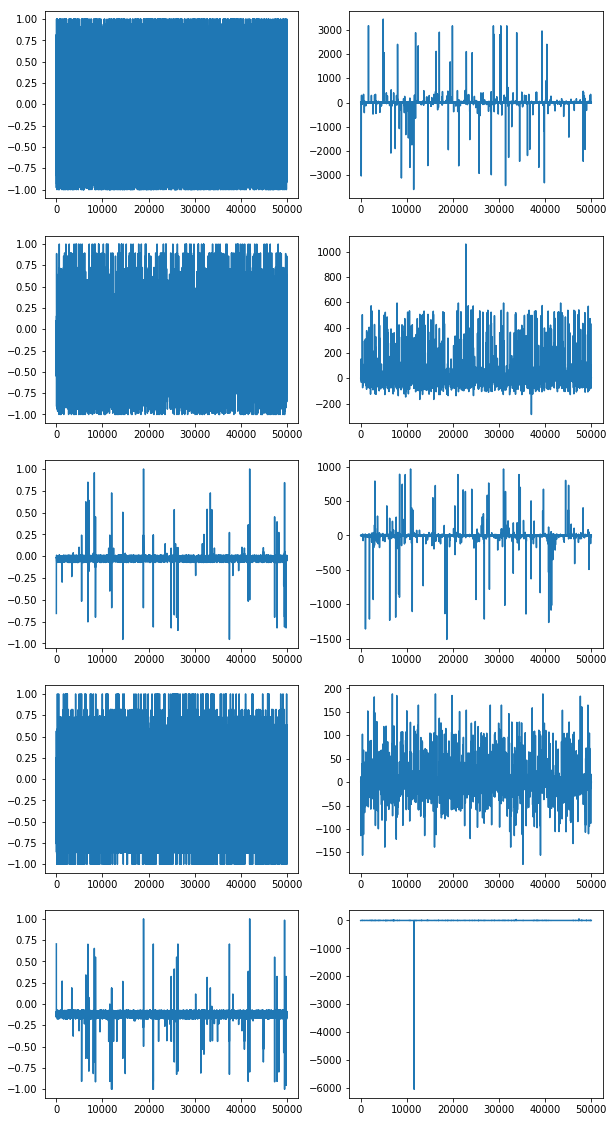

In [41]:
fig, axes = plt.subplots(dfast.shape[1], 2, figsize=(10,20))
for i, ax in enumerate(axes[:,1]):
    ax.plot(dfast[::10,i])
#     ax.set_ylim((0,10))
for i, ax in enumerate(axes[:,0]):
    ax.plot(fast_modes[::10,i])
    

In [40]:
np.save(traj_name.replace('otraj', 'slow_modes'), slow_modes)
np.save(traj_name.replace('otraj', 'fast_modes'), fast_modes)